# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [8]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_dim, num_nuerons = [512, 256, 128], output_units = 10):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_dim)
    for i, n_units in enumerate(num_nuerons):
      if i == 0:
        hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer_{}'.format(i+1))(input_layer)
      else:
        hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer_{}'.format(i+1))(hidden_layer)
    output_layer = keras.layers.Dense(units=output_units, activation='softmax', name='out_put_layer')(hidden_layer)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [13]:
## 超參數設定
"""
Set your required experiment parameters
"""
learning_rate = [0.1, 0.01, 0.001, 0.0001]
epochs = 50
batch_size = 256

In [14]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in learning_rate:
  sgd = keras.optimizers.SGD(learning_rate=lr)
  rmsprop = keras.optimizers.RMSprop(learning_rate = lr)
  adagrad = keras.optimizers.Adagrad(learning_rate = lr)
  adam = keras.optimizers.Adam(learning_rate=lr)
  for optimizer in [sgd, rmsprop, adagrad, adam]:
    keras.backend.clear_session()
    print('optimizer:{}, learning_rate:{}'.format(optimizer, lr))
    model = build_mlp(input_dim=x_train.shape[1:])
    # aa = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)
    # break
    training_loss = model.history.history['loss']
    validation_loss = model.history.history['val_loss']
    training_acc = model.history.history['accuracy']
    validation_acc = model.history.history['val_accuracy']

    name = 'optimizer:{}, learning_rate:{}'.format(optimizer, lr)
    results[name] = {'training_loss':training_loss,
                     'validation_loss':validation_loss, 
                     'training_acc':training_acc, 
                     'validation_acc':validation_acc}

optimizer:<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7f0f80244c50>, learning_rate:0.1
Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 2.1517 - accuracy: 0.2098 - val_loss: 1.8912 - val_accuracy: 0.3126
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8618 - accuracy: 0.3319 - val_loss: 1.7947 - val_accuracy: 0.3497
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7633 - accuracy: 0.3699 - val_loss: 1.7464 - val_accuracy: 0.3669
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6869 - accuracy: 0.3991 - val_loss: 1.6196 - val_accuracy: 0.4222
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6295 - accuracy: 0.4187 - val_loss: 1.7366 - val_accuracy: 0.3718
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5920 - accuracy: 0.4298 - val_loss: 1.5567 - val_accuracy: 0.4454
Epoch 7/50
196/196 [==============

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

'\n將實驗結果繪出\n'

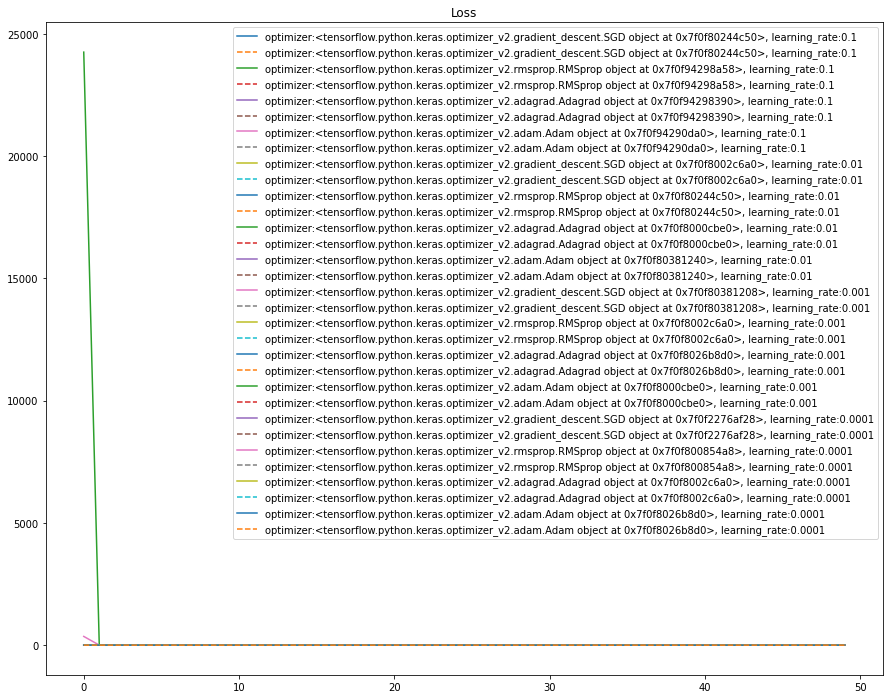

In [16]:
plt.figure(figsize=(15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['training_loss'])), results[cond]['training_loss'], '-', label = cond)
  plt.plot(range(len(results[cond]['validation_loss'])), results[cond]['validation_loss'], '--', label = cond)
plt.title("Loss")
plt.legend()
plt.show()

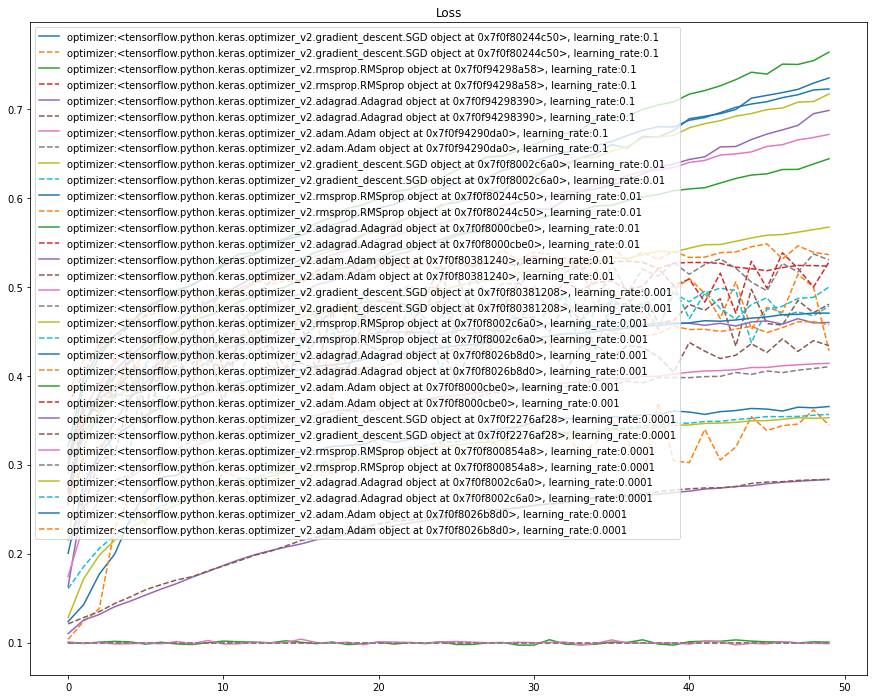

In [17]:
plt.figure(figsize=(15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['training_acc'])), results[cond]['training_acc'], '-', label = cond)
  plt.plot(range(len(results[cond]['validation_acc'])), results[cond]['validation_acc'], '--', label = cond)
plt.title("Loss")
plt.legend()
plt.show()